In [1]:
%matplotlib inline

In [2]:
# Import required modules
import numpy as np
import scipy
from scipy.signal import firwin, freqz, lfilter
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)

In [7]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
P = 5

x_p = x.reshape((len(x)//P, P)).T
print (x_p)

[[ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]]


In [8]:
def pfb_fir_frontend(x, win_coeffs, M, P):
    W = int(x.shape[0] / M / P)
    x_p = x.reshape((W*M, P)).T
    h_p = win_coeffs.reshape((M, P)).T
    x_summed = np.zeros((P, M * W - M))
    for t in range(0, M*W-M):
        x_weighted = x_p[:, t:t+M] * h_p
        x_summed[:, t] = x_weighted.sum(axis=1)
    return x_summed.T

In [9]:
def generate_win_coeffs(M, P, window_fn="hamming"):
    win_coeffs = scipy.signal.get_window(window_fn, M*P)
    sinc       = scipy.signal.firwin(M * P, cutoff=1.0/P, window="rectangular")
    win_coeffs *= sinc
    return win_coeffs

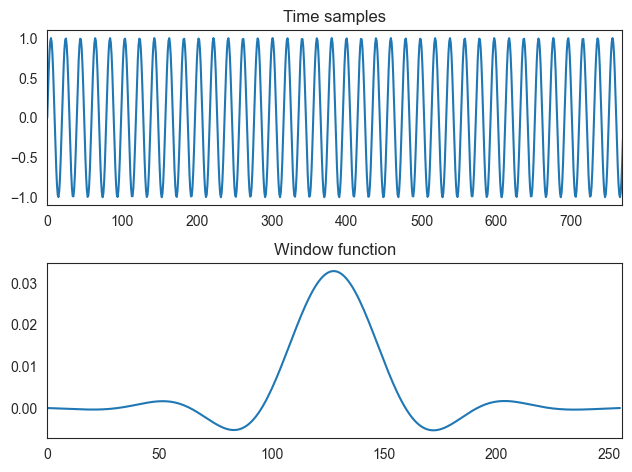

In [10]:
M = 8
P = 32

x = np.sin(np.arange(0, M*P*10) / np.pi)
win_coeffs = generate_win_coeffs(M, P, window_fn="hamming")

plt.subplot(2,1,1)
plt.title("Time samples")
plt.plot(x)
plt.xlim(0, M*P*3)

plt.subplot(2,1,2)
plt.title("Window function")
plt.plot(win_coeffs)
plt.xlim(0, M*P)

plt.tight_layout(pad=1.0)
plt.show()

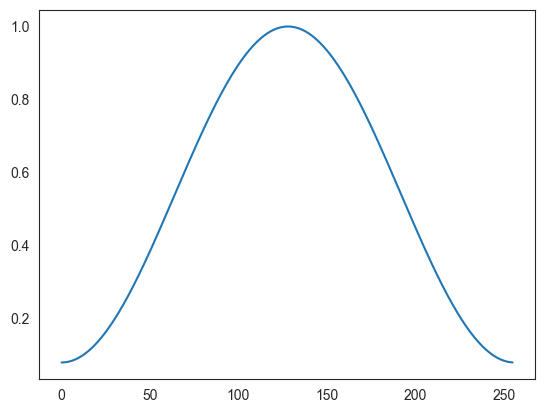

In [13]:
plt.plot(scipy.signal.get_window("hamming", 8*32))

In [14]:
y_p = pfb_fir_frontend(x, win_coeffs, M, P)

print("n_taps: %i" % M)
print("n_branches: %i" % P)
print("Input signal shape: %i" % x.shape)
print("Window shape:       %i" % win_coeffs.shape)
print("Output data shape: %s" % str(y_p.shape))

n_taps: 8
n_branches: 32
Input signal shape: 2560
Window shape:       256
Output data shape: (72, 32)


(72,)


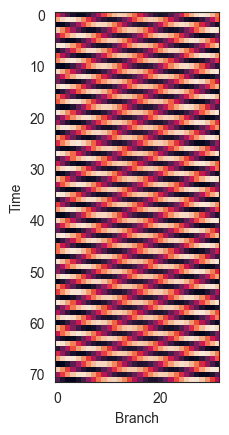

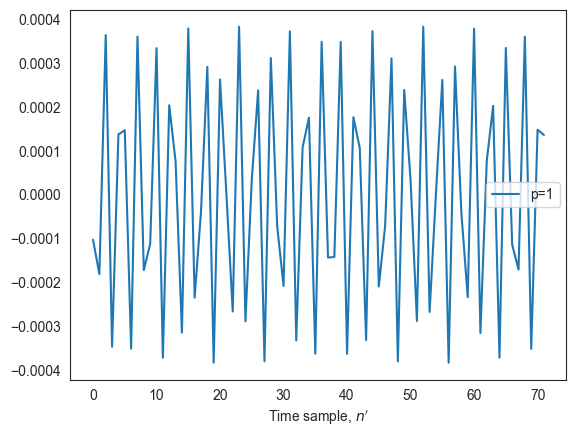

In [32]:
plt.figure()
plt.imshow(y_p)
plt.xlabel("Branch")
plt.ylabel("Time")
print(sum(y_p.T).shape)
plt.figure()
plt.plot(sum(y_p.T), label="p=1")
plt.xlabel("Time sample, $n'$")
plt.legend()
plt.show()

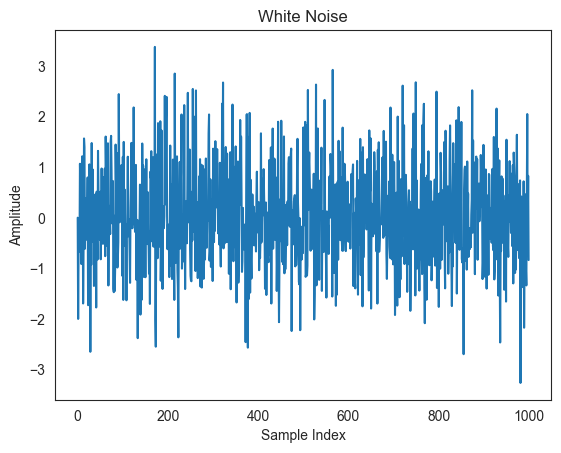

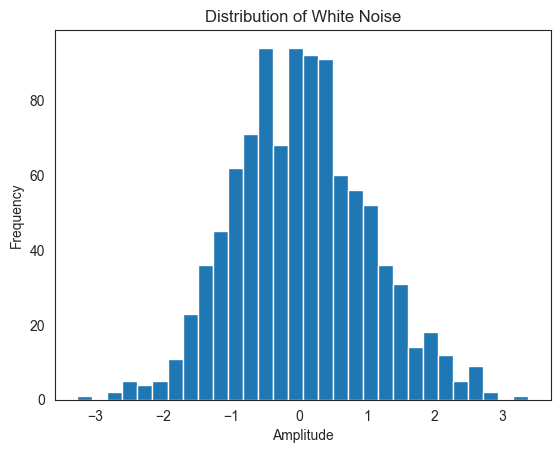

In [33]:
# Define parameters
num_samples = 1000
mean = 0
std_dev = 1  # Standard deviation for white noise

# Generate white noise
noise = np.random.normal(mean, std_dev, num_samples)

# Optional: Plot the noise
plt.plot(noise)
plt.title("White Noise")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

# Optional: Plot the distribution (histogram)
plt.hist(noise, bins=30)
plt.title("Distribution of White Noise")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.show()

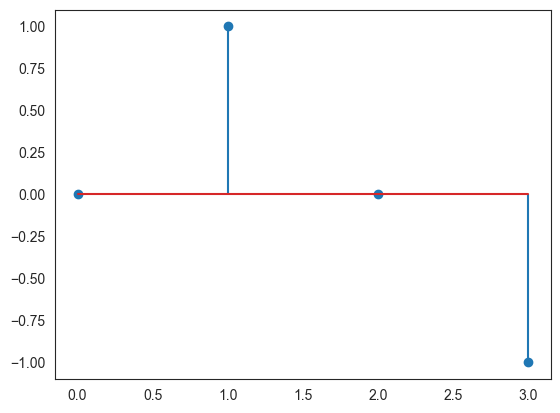

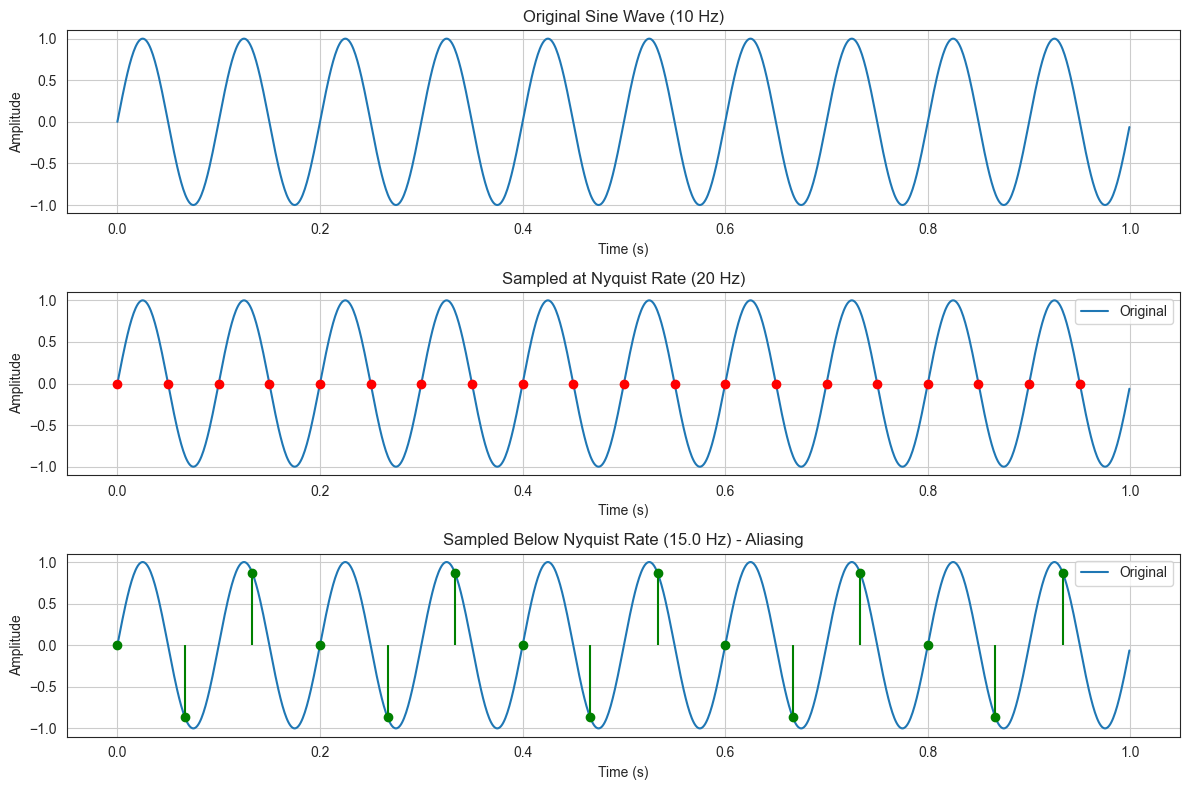

In [51]:
# Signal parameters
fs = 4  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f1 = 1  # Frequency of first sine wave
signal_data = np.sin(2 * np.pi * f1 * t)
plt.stem(signal_data)

# Signal parameters
frequency = 10  # Hz
amplitude = 1
duration = 1    # seconds

# Time vector for the original continuous signal (high resolution)
t_continuous = np.linspace(0, duration, 1000, endpoint=False)
signal_continuous = amplitude * np.sin(2 * np.pi * frequency * t_continuous)

# Sampling at or above Nyquist rate
sampling_frequency_nyquist = 2 * frequency  # 20 Hz
num_samples_nyquist = int(sampling_frequency_nyquist * duration)
t_sampled_nyquist = np.linspace(0, duration, num_samples_nyquist, endpoint=False)
signal_sampled_nyquist = amplitude * np.sin(2 * np.pi * frequency * t_sampled_nyquist)

# Sampling below Nyquist rate (aliasing)
sampling_frequency_aliasing = 1.5 * frequency  # 15 Hz (less than 20 Hz)
num_samples_aliasing = int(sampling_frequency_aliasing * duration)
t_sampled_aliasing = np.linspace(0, duration, num_samples_aliasing, endpoint=False)
signal_sampled_aliasing = amplitude * np.sin(2 * np.pi * frequency * t_sampled_aliasing)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t_continuous, signal_continuous)
plt.title('Original Sine Wave (10 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t_continuous, signal_continuous, label='Original')
plt.stem(t_sampled_nyquist, signal_sampled_nyquist, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.title(f'Sampled at Nyquist Rate ({sampling_frequency_nyquist} Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t_continuous, signal_continuous, label='Original')
plt.stem(t_sampled_aliasing, signal_sampled_aliasing, linefmt='g-', markerfmt='go', basefmt=' ')
plt.title(f'Sampled Below Nyquist Rate ({sampling_frequency_aliasing} Hz) - Aliasing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()